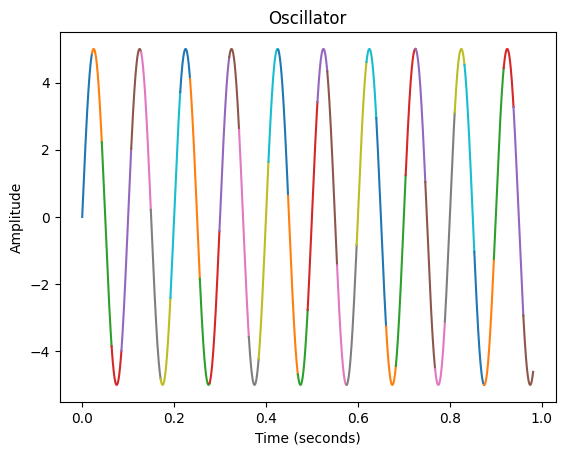

In [43]:
import numpy as np
import matplotlib.pyplot as plt

sampleRate = 48000
timeSecond = 1
bufferSize = 1024
oscFrequency = 10
amplitude = 5
phase = 0 # 0 - 1

numBuffers = int(np.ceil(sampleRate * timeSecond / bufferSize))
signal = np.zeros(sampleRate*timeSecond) 
time = np.arange(0, timeSecond, 1/sampleRate)

for i in range(0, len(signal)):
    # sine
    signal[i] = amplitude * np.sin(time[i] * 2*np.pi*oscFrequency + phase)

    # square
    #signal[i] = amplitude * np.sign(np.sin(time[i] * 2*np.pi*oscFrequency + phase))

    # triangle
    #signal[i] = 2 * amplitude * np.abs((time[i] * oscFrequency + phase) % 1 - 0.5)
    # HINT
    # %1 to get the fractional part 5.75 % 1 = 0.75

    # sawtooth
    #signal[i] = (2 * (time[i] * oscFrequency - np.floor(0.5 + time[i] * oscFrequency)))


buffers = np.zeros((numBuffers, bufferSize))
for i in range(numBuffers):
    startIdx = i * bufferSize
    endIdx = startIdx + bufferSize
    buffer_data = signal[startIdx:endIdx]
    if len(buffer_data) < bufferSize:
        buffer_data = np.pad(buffer_data, (0, bufferSize - len(buffer_data)), mode='constant', constant_values=0)
    buffers[i] = buffer_data


for i in range(numBuffers):
    startIdx = i * bufferSize
    endIdx = startIdx + bufferSize
    time_slice = time[startIdx:endIdx]
    if len(time_slice) < bufferSize:
        break
    plt.plot(time_slice, buffers[i])

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Oscillator")
plt.show()